# Steps for Basics GAN Network Implementation

## Data Generation:

We generate a sample dataset consisting of 1000 data points drawn from a normal distribution with a mean of 4 and a standard deviation of 1.25. This serves as our real data.
## Generator Model:

We define a simple neural network model called the generator, which takes a 1-dimensional noise vector as input and generates a single scalar value as output. This output represents a synthetic data point.
### Discriminator Model:

We define another neural network model called the discriminator, which takes a single scalar value as input and outputs a probability score indicating whether the input is real or fake.
## GAN Model:

We combine the generator and discriminator models to form the GAN model. The generator is connected to the discriminator, and during training, we update the generator's weights to minimize the discriminator's ability to distinguish between real and fake data.
## Training Loop:

We iterate over a fixed number of epochs and in each epoch:
We generate random noise as input for the generator.
We use the generator to produce fake data points.
We sample real data points from the dataset.
We train the discriminator to distinguish between real and fake data.
We train the generator to fool the discriminator by generating data points that are classified as real.
Both the discriminator and the generator are trained using binary cross-entropy loss.
Visualization:

Finally, we generate synthetic data using the trained generator and plot the distributions of real and synthetic data to visualize how well the GAN has learned to generate data similar to the real data distribution.

4/4 [==============================] - 0s 4ms/step
Epoch: 0, Discriminator Loss: 0.7442309260368347, Generator Loss: 0.6951651573181152
4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch: 500, Discriminator Loss: 0.6928268671035767, Generator Loss: 0.7007244825363159
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 0s/step
Epoch: 1000, Discriminator Loss: 0.6932046413421631, Generator Loss: 0.68599933385849
4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 5ms/step
Epoch: 1500, Discriminator Loss: 0.6921987533569336, Generator Loss: 0.6944524049758911
4/4 [==============================] - 0s 1000us/step


4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 5ms/step
Epoch: 2000, Discriminator Loss: 0.6935378313064575, Generator Loss: 0.7164474725723267
4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 520us/step
Epoch: 2500, Discriminator Loss: 0.6942841410636902, Generator Loss: 0.6413650512695312
4/4 [==============================] - 0s 34us/step


4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 0s/step
Epoch: 3000, Discriminator Loss: 0.6944112777709961, Generator Loss: 0.6665606498718262
4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 689us/step


4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 167us/step
Epoch: 3500, Discriminator Loss: 0.6930021047592163, Generator Loss: 0.6992006301879883
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 653us/step


4/4 [==============================] - 0s 1ms/step
Epoch: 4000, Discriminator Loss: 0.7108936309814453, Generator Loss: 0.528138279914856
4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 5ms/step
Epoch: 4500, Discriminator Loss: 0.6935800313949585, Generator Loss: 0.6640442609786987
4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 0s/step


32/32 [==============================] - 0s 626us/step


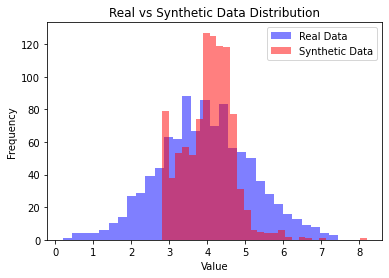

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Generate sample data
np.random.seed(0)
data_mean, data_stddev = 4, 1.25
data = np.random.normal(data_mean, data_stddev, 1000).reshape(-1, 1)

# Define the Generator model
generator = Sequential([
    Dense(128, activation='relu', input_shape=(1,)),
    Dense(1, activation='linear')
], name='generator')

# Define the Discriminator model
discriminator = Sequential([
    Dense(128, activation='relu', input_shape=(1,)),
    Dense(1, activation='sigmoid')
], name='discriminator')

# Compile the discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy')

# Combine Generator and Discriminator to form the GAN model
discriminator.trainable = False  # Ensure only generator is trained
gan = Sequential([
    generator,
    discriminator
])

# Compile the GAN
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Training loop
def train_gan(data, epochs=5000, batch_size=128):
    for epoch in range(epochs):
        # Generate random noise as input for the generator
        noise = np.random.normal(0, 1, size=(batch_size, 1))
        
        # Generate fake data points using the generator
        fake_data = generator.predict(noise)
        
        # Sample real data points
        real_data = data[np.random.randint(0, data.shape[0], size=batch_size)]
        
        # Combine real and fake data points for training the discriminator
        X = np.concatenate([real_data, fake_data])
        
        # Label real data as 1 and fake data as 0 for training the discriminator
        y = np.ones((2 * batch_size, 1))
        y[batch_size:] = 0
        
        # Train the discriminator
        discriminator_loss = discriminator.train_on_batch(X, y)
        
        # Generate new noise for training the generator
        noise = np.random.normal(0, 1, size=(batch_size, 1))
        
        # Label fake data as real (1) to fool the discriminator
        y = np.ones((batch_size, 1))
        
        # Train the generator (via the GAN model)
        gan_loss = gan.train_on_batch(noise, y)
        
        # Print progress
        if epoch % 500 == 0:
            print(f"Epoch: {epoch}, Discriminator Loss: {discriminator_loss}, Generator Loss: {gan_loss}")

# Train the GAN
train_gan(data)

# Generate synthetic data using the trained generator
synthetic_data = generator.predict(np.random.normal(0, 1, size=(1000, 1)))

# Plot the real and synthetic data distributions
plt.hist(data, bins=30, alpha=0.5, color='blue', label='Real Data')
plt.hist(synthetic_data, bins=30, alpha=0.5, color='red', label='Synthetic Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Real vs Synthetic Data Distribution')
plt.show()
